In [1]:
from time import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ctypes
%matplotlib inline  

# Homework 3

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [3]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        """
        Head Node initialization
        Preset: head_node = None
        """

        self.head_node = head_node
    
    def list_traversed(self):
        """
        List Traversed
        Print all the sigle linked list
        """
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
    
    def insert_head(self, new_node):
        """
        Insert Head
        Inserts a node in the first place of the list
        """
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
    
    def insert_tail(self, new_node):
        """
        Insert Tail
        Inserts a node at the end of the list where the node.next_node = None.
        """
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null 
        node = self.head_node
        prev = self.head_node
        while node:
            prev = node
            node = node.next_node
        if not prev:
            self.head_node = new_node
        else:
            prev.set_next_node(new_node)
        
    def insert_middle(self, new_node, value):
        """
        Insert Middle
        Inserts a node at next node of a specific value at the list.
        If not found -> insert_tail()
        """
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        #Changed case not val found
        while node:
            if node.val == value :  #Prevents None has no attribute 'val'
                break
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete_head(self):
        """
        Delete head
        Deletes first node of the list.
        If None -> pass
        """
        #delete value
        # A -> B -> C -> None
        # B -> C -> None
        node = self.head_node
        self.head_node = node.next_node
        node.next_node = None

    def delete_tail(self):
        """
        Delete tail
        Deletes last node of the list.
        """
        #delete value
        # A -> B -> C -> None
        # A -> B -> None
        node = self.head_node
        prev = self.head_node
        while node.next_node:
            prev = node
            node = node.next_node
        prev.set_next_node(None)

    def delete(self,value):
        """
        Delete
        Deletes a node at a specific value of the list.
        If not found -> pass
        If firts -> Changes the head node
        """
        #delete value
        # A -> B -> C -> None
        # A -> C -> None
        node = self.head_node
        prev = None
        while node:
            if node.val == value :
                break
            prev = node
            node = node.next_node
        if node:
            if not prev:    #Prevent head node error. None has no attribute 'set_next_node'
                self.head_node = node.next_node
                node.next_node = None
            else:
                prev.set_next_node(node.next_node)
                node.next_node = None

In [4]:
def merge_sorted_lists(L1,L2):
    """Merge 2 Sorted Singly Linked Lists
        Input: Two sorted lists
        Output: A sorted merge sorted list
    """
    def node_recursion(Node1, Node2):
        """Recursion Nodes
            Base Case: if one node is None, return the other complete node.
                        This action works because if one list is finished by the
                        merge algorithm, the other list will be ordered as well.
            Recursive: set temp node the lowest between the two lists and set_next_node
                        to the next lowest node between the two in a recursive way.

        """
        #Base case
        temp = None
        if not Node1:
            return Node2
        if not Node2:
            return Node1
            
        #Recursion
        if (Node1.val <= Node2.val):
            temp = Node1
            #Node1 recursion with next node, Node 2 with the same, to compare again
            temp.set_next_node(node_recursion(Node1.next_node, Node2))
        if (Node2.val <= Node1.val):
            temp = Node2
            #Node1 recursion with next node, Node 2 with the same, to compare again
            temp.set_next_node(node_recursion(Node1, Node2.next_node))
        return temp

    #Returns a Singly linked list with the head node of the node recursion
    return Singly_linked_list(node_recursion(L1.head_node, L2.head_node))

In [5]:
L1 = Singly_linked_list(Node(1))
L1.insert_tail(Node(3))
L1.insert_tail(Node(5))
L1.insert_tail(Node(7))

print("Lista 1:")
L1.list_traversed()

L2 = Singly_linked_list(Node(2))
L2.insert_tail(Node(4))
L2.insert_tail(Node(6))

print("Lista 2:")
L2.list_traversed()

print("Merge List:")
merge_sorted_lists(L1,L2).list_traversed()

Lista 1:
1
3
5
7
Lista 2:
2
4
6
Merge List:
1
2
3
4
5
6
7


2. Calculate complexity

To analyze the complexity of the algorithm we have to use the recursive approach.

$$O(T) = R \times O(s)$$

where R is the number of recursions, and $O(s)$ the complexity of each recursion.

In the previous algorithm, $O(s)$ can be calculated in the following way:

In [6]:
def merge_sorted_lists(L1,L2):
    def node_recursion(Node1, Node2):
        temp = None
        if not Node1:
            return Node2
        if not Node2:
            return Node1
        if (Node1.val <= Node2.val):
            temp = Node1
            temp.set_next_node(node_recursion(Node1.next_node, Node2))
        if (Node2.val <= Node1.val):
            temp = Node2
            temp.set_next_node(node_recursion(Node1, Node2.next_node))
        return temp
    return Singly_linked_list(node_recursion(L1.head_node, L2.head_node))

The node_recursion() has only if clauses, therefore the time complexity is: $O(s)= O(1)$

Now the number of times that the recursion goes on depends on the length and how scrambled are the lists. In the worst case, both lists have the same length n and the values are intertwined. Therefore, the algorithm have to pass through both lists completely.

$$R = n+m$$

n = length List 1

m = length List 2

The total complexity of the algorithm is: 

$$O(n) = (n+m)*O(s) = (n+m)*O(1)$$
$$O(T) = O(n+m)$$

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [7]:
def quick_sort(array):
    """Quick Sort
    Input: Array
    Output: Sorted array

    Base Case: if length is 1 return the array
    Recursion: Create 2 arrays max and min. Establish the first value of the array
    as pivot. Insert in the max the values greater than the pivot and in min, the lower values.
    """
    #Base Case
    if len(array) <= 1:
        return array
    #Recursion
    pivot = array[0]
    A_max = []
    A_min = []

    #order greater or lower values on each array max, min. 
    for i in range(1,len(array)):
        if array[i] > pivot:
            A_max.append(array[i])
        else:
            A_min.append(array[i])

    left = quick_sort(A_min)
    right = quick_sort(A_max)
    return merge(left,pivot,right)

def merge(left,pivot,right):
    """ Merge
    Input: left,pivot,right.
    Output: Returns the sum of the left array, appended with the pivot,
    and again appended with the right array.
    """
    #merge in a single array, appending left
    left.append(pivot)
    for i in range(len(right)):
        left.append(right[i])
    return left

In [8]:
A = [1,9,7,6,4,5]
quick_sort(A)

[1, 4, 5, 6, 7, 9]

2. 

- how/where do you divide?
    
The given problem is to sort a list. Therefore, it is better to divide the list into sublists that are easier to solve. On QuickSort, first I choose the first value of a given array as a pivot. This pivot will let me divide the array into two arrays. The first one with values lower than the pivot, and the other with greater values. This will subdivide the given array into smaller arrays which are easier to approach and solve the problem. 

- where/what do you conquer?

In the process of dividing the problem, we conquer the fact that if we continuously divide the array into greater and lower arrays and each one again are divided, we should only have to solve the base case situation. We will have a max array and a min array with only one value, and a pivot. Therefore, the only part to be done is to order this three elements. 
    
- how/what do you combine?

The problem is trivial once we have only three numbers to order. At first goes the min array. Then we append the pivot and finally append the max array. This will result in the initial goal of sorting a big array. Therefore, the implemented Divide and Conquer technique is known as Quick Sort with a recursive algorithm.

3.

As mentioned in the previous problem, to find the complexity we have to get the individual complexity of each recursion and the times that the algorithm performs the recursive method.

On Quick Sort we have a tree distribution of divisions of the initial array. Therefore, it follows the progression: n + n/2 + n/4 ... 1. This process repeats a total number of $log(n)$ times. Consequently we have:

$$R = log(n)$$

In addition, we have to analyze the complexity of each individual recursion. 
Because inside the method there is a for loop that traverse the entire array, we have the following complexity:

$$O(s) = O(n)$$

Finally, the total complexity of QuickSort is:

$$ O(T) = O(nlog(n)) $$

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [9]:
import random
def random_array():
    array = []
    for i in range(10000):
        array.append(random.randint(1,10000))
    return array

A = []
for i in range(1000):
    A.append(random_array())

2.

In [10]:
#Decorador para calcular el tiempo de ejecucion de una funcion
from time import sleep

def calculo_tiempo(funcion):
    """
        En este decorador se crea un arreglo de dos dimensiones,
        la primera con el resultado de la funcion y el segundo
        con el tiempo de ejecucion de la misma.
    """

    #Se usa el sleep de 1s porque sino el resultado que devuelve es 0 por algun proceso interno de la computadora.
    def wrapper(*args, **kwargs):
        result = [0,0]    #Declaramos el arreglo
        start = 10**6*time()    #Se toma el tiempo inicial
        #sleep(1)    #Espera de 1s
        result[0] = funcion(*args, **kwargs)    #Se ejecuta la función
        result[1] = 10**6*time() - start #- 1*10**6    #Se toma la diferencia de tiempos menos 1s
        return result  
    return wrapper

* Merge Sort

In [19]:
@calculo_tiempo
def merge_sort_time(nums):
    return merge_sort(nums)
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1
    
    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])
    
    return sorted_list

* Quick Sort

In [12]:
@calculo_tiempo
def quick_sort(array):
    if len(array) <= 1:
        return array
    pivot = array[0]
    A_max = []
    A_min = []
    for i in range(1,len(array)):
        if array[i] > pivot:
            A_max.append(array[i])
        else:
            A_min.append(array[i])

    left = quick_sort(A_min)
    right = quick_sort(A_max)
    return merge_qk_sort(left,pivot,right)

def merge_qk_sort(left,pivot,right):
    left.append(pivot)
    for i in range(len(right)):
        left.append(right[i])
    return left

Executing merge sort and quick sort for each permutation.

In [24]:
A = []
for i in range(1000):
    A.append(random_array())

B = []
for i in range(1000):
    B.append(random_array())

T1 = np.zeros(1000)   
T2 = np.zeros(1000)  

for i in range(1000):
    T1[i] = quick_sort(A[i])[1]
    T2[i] = merge_sort_time(B[i])[1]

3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.

<AxesSubplot: xlabel='Permutation'>

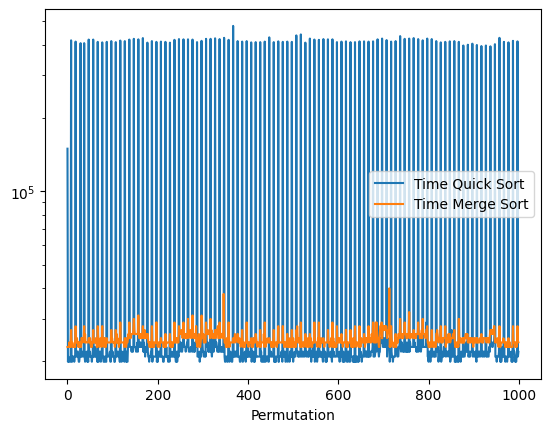

In [28]:
n = np.zeros(1000)
for i in range(1000):
    n[i] = i
plot1 = pd.DataFrame()
plot1['Time Quick Sort'] = T1
plot1['Time Merge Sort'] = T2
plot1['Permutation'] = n
plot1.plot(x='Permutation', y=['Time Quick Sort','Time Merge Sort'],logy=True)

I will filter the unexpected values at Quick Sort due to an unknown bad behaviour of the time decorator. All values above $10^5 [\mu s]$ are changed to 0.

<AxesSubplot: xlabel='Permutation'>

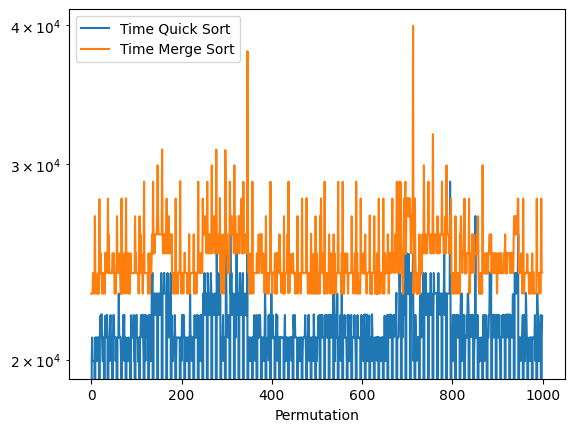

In [29]:
for i in range(1000):
    if T1[i] > 10**5:
        T1[i] = 0
plot1 = pd.DataFrame()
plot1['Time Quick Sort'] = T1
plot1['Time Merge Sort'] = T2
plot1['Permutation'] = n
plot1.plot(x='Permutation', y=['Time Quick Sort','Time Merge Sort'],logy=True)


4. Explain the differences. Which algorithm is better? When would you use each?

As seen in the plot, the algorithm of QuickSort is better than MergeSort for almost every case. It has a lower computing time. Therefore for most random arrays from 1 to 10000 values, QuickSort is better than Merge Sort.

I should use Merge Sort in the case I trully know that the array we want to sort is already sorted up to the pivot point. If we know this, the complexity of Merge Sort reduces a lot and possibly can be better than Quick Sort. It is important to point out that the pivot should not be near the first positions of the array because this would be no sense.

In other cases, for randomly scrambled lists it is better Quick Sort to order a List. 

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?

1.

In [79]:
def factorial(k):
    if k == 0:
        return 1

    return k*factorial(k-1)

2.

In [80]:
F = []
for i in range(1,1000):
    F.append(factorial(i))

3.

In [81]:
#Decorador para calcular el tiempo de ejecucion de una funcion
from time import sleep

def calculo_tiempo(funcion):
    """
        En este decorador se crea un arreglo de dos dimensiones,
        la primera con el resultado de la funcion y el segundo
        con el tiempo de ejecucion de la misma.
    """

    #Se usa el sleep de 1s porque sino el resultado que devuelve es 0 por algun proceso interno de la computadora.
    def wrapper(*args, **kwargs):
        result = [0,0]    #Declaramos el arreglo
        start = 10**6*time()    #Se toma el tiempo inicial
        sleep(1)    #Espera de 1s
        result[0] = funcion(*args, **kwargs)    #Se ejecuta la función
        result[1] = 10**6*time() - start - 1*10**6    #Se toma la diferencia de tiempos menos 1s
        return result  
    return wrapper

In [82]:
@calculo_tiempo
def factorial_time(k):
    def factorial(k):
        if k == 0:
            return 1

        return k*factorial(k-1)
    return factorial(k)

In [83]:
T1 = np.zeros(1000)
n = np.zeros(1000)
for i in range(1,1000):
    T1[i] = factorial_time(i)[1]
    n[i] = i

<AxesSubplot: xlabel='n'>

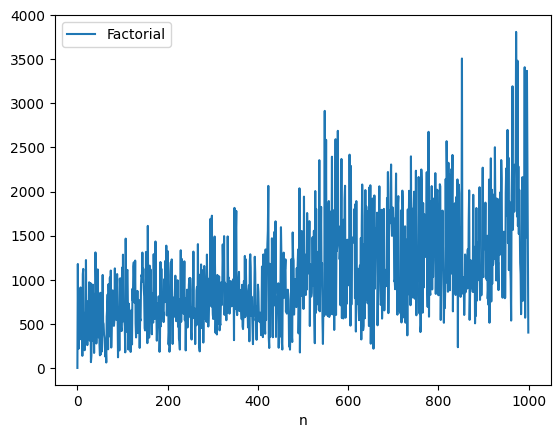

In [84]:
plot2 = pd.DataFrame()
plot2['Factorial'] = T1
plot2['n'] = n
plot2.plot(x='n', y=['Factorial'])


4. What's the complexity?

To calculate the complexity we have to use the following equation:

$$O(T) = R\times O(s)$$

In the case of the factorial, $O(s)$ is $O(1)$ because it has no loops, therefore the complexity is constant. 

On the other hand the number of times that the algorithm calls the recursive method is $n$ times, where $n$ is the number we want to calculate the factorial. 

Finally we obtain a total complexity of:

$$O(T) = O(n)$$

5. Implement memoization to improve the performance of your code

In [85]:
@calculo_tiempo
def factorial_time_mem(k,cache):
    def factorial_mem(k,cache):
        if k in cache.keys():
            return cache[k]
        if k == 0:
            cache[k] = 1
            return 1
            
        res = k*factorial_mem(k-1,cache)
        cache[k] = res
        return res
    return factorial_mem (k,cache)

6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.

In [86]:
T2 = np.zeros(1000)
cache = {}
for i in range(1,1000):
    T2[i] = factorial_time_mem(i,cache)[1]


<AxesSubplot: xlabel='n'>

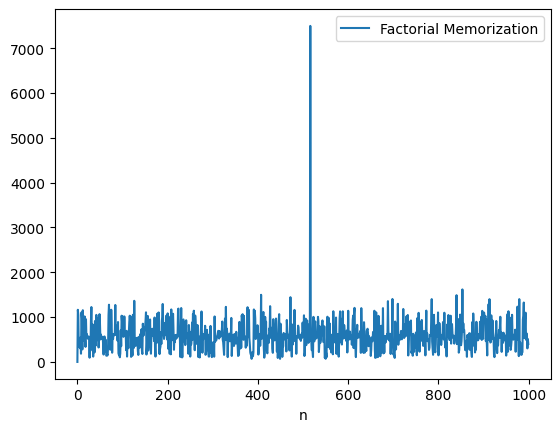

In [87]:
plot2['Factorial Memorization'] = T2
plot2.plot(x='n', y=['Factorial Memorization'])

7. What's the complexity of your code using memoization?

The code with memorization stores the values of factorials that were calculated before and use it in a faster way to return a result. Therefore, in my implementation, due to this structure:

In [ ]:
T2 = np.zeros(100)
cache = {}
for i in range(1,100):
    T2[i] = factorial_time_mem(i,cache)[1]

The first factorial to be calculated is 1!, so it is stored in the cache. Then 2! but in this case, the recursive call just return the value already stored. This complexity is still constant. Nonetheless, the algorithm still has a recursive step. And with the next factorials this situation repeats. 

To summerize, in the case of memorization and in the case of non memorization, the time complexity of each recursive method is:
$$O(s) = O(1)$$

On the other hand, the number times that the recursive method is repeated on the case of memorization is:
$$R = 2$$
Because, the second recursion is already stored in the implementation performed. Finally, we have total a time complexity of:

$$O(T) = 2*O(1) = O(1)$$


8. How does the first implementation and the one with memoization compare?

<AxesSubplot: xlabel='n'>

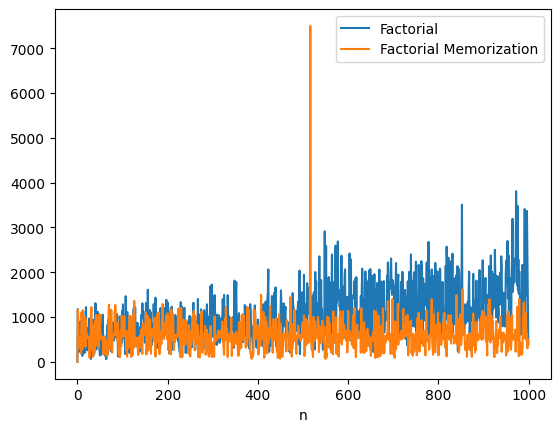

In [88]:
plot2.plot(x='n', y=['Factorial','Factorial Memorization'])

As we see in the graph, the complexity predictions for both implementations are correct. In the factorial function without memorization, we can see a light linear tendency. Even if it is very weak, the tendency is appreciable. 

On the other hand, the memorization implementation doesn't change the time complexity. Therefore, it is constant as predicted. 

To conclude, it is proved that the memorization factorial implementation is better than the same implementation without using a cache dictionary.